### Demo notebook to add a parcellation on top of the surface

Done:
1. Create our own mesh of the plane (2 faces of right angle square)
1.a. Create a square plane with 2 faces and basic coordinates
1.b. Change the coordinates to be in the middle of the brain
2. Add those faces and vertices to the brain vertices and faces
3. Adjust the coordinates of the plane to look like it cuts the brain (with an angle)
4. Adjust the coordinates to match the volume coordinates of a slice
5. Provide coordinate of plane

Todo:
6. Create function. Enable to give y as RAS or MRI coordinates
6. Make the plane transparent

Other
7. Add an option to change the plane view (axes)
8. Add an option to add more than one plane

In [1]:
# import libraries
import os, sys
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np


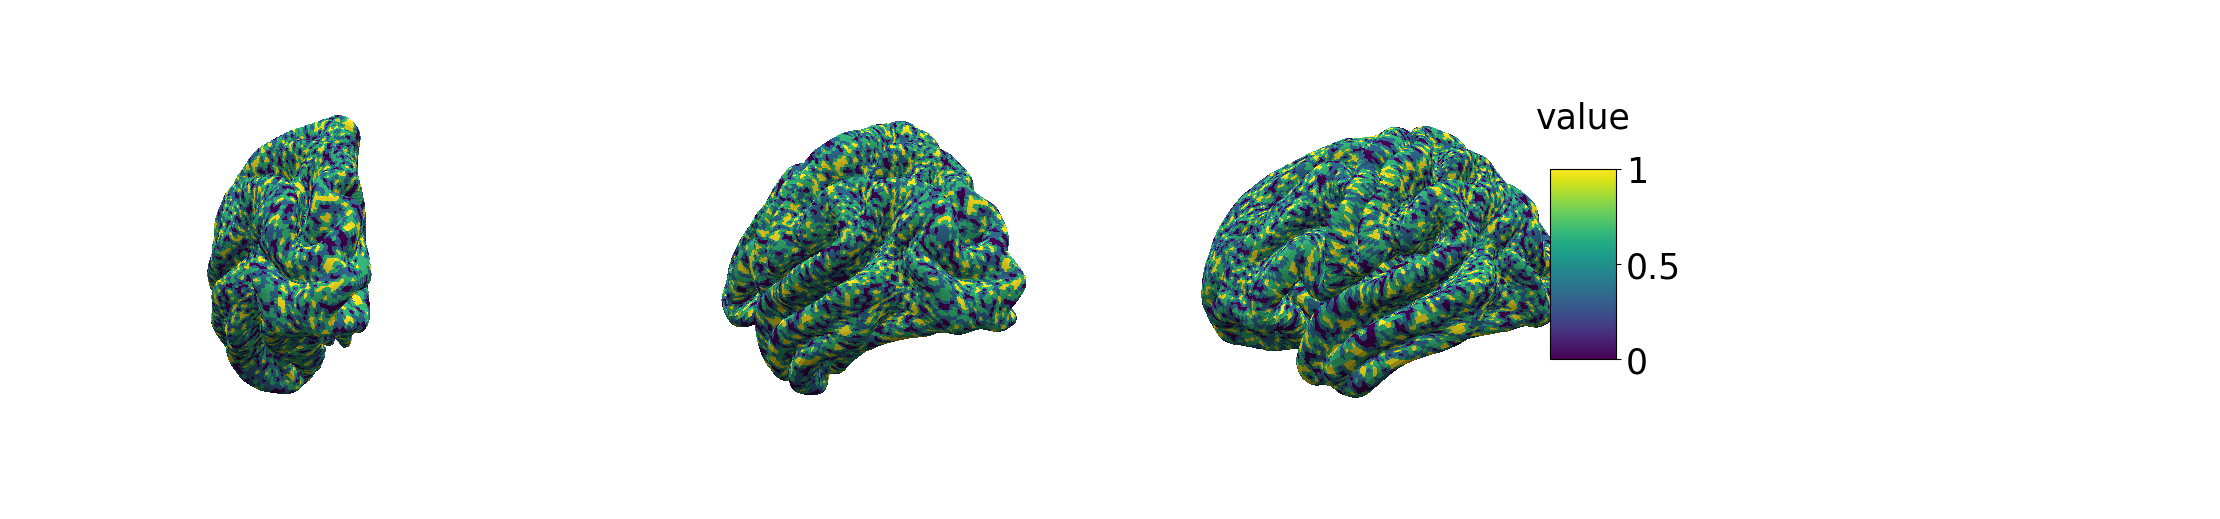

In [2]:
# get the brain vertices and faces from MNI brain
import random
gii_file= nb.load('../../michack_project_data/fs_LR.32k.L.pial.surf.gii')
vertices_brain = gii_file.darrays[0].data
faces_brain = gii_file.darrays[1].data
# overlay_brain = np.ones(len(vertices_brain))
overlay_brain = np.array([random.choice(range(2)) for _ in range(len(vertices_brain))])

plot_surf(vertices_brain, faces_brain, overlay_brain, 
          rotate=[0, 45, 90], vmin=0, vmax=1,)

(197, 233, 189)


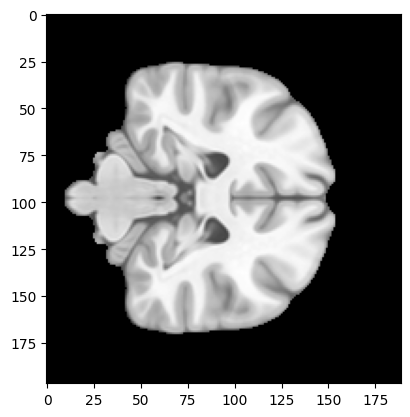

In [3]:
# upload the MRI slice
import matplotlib.pyplot as plt

brain_file = nb.load('../../michack_project_data/MNI152_T1_1mm.nii.gz')
brain_vol = brain_file.get_fdata()

print(brain_vol.shape)
# plt.imshow(np.flipud(brain_vol[:, 100, :].T), cmap='gray')
# brain_vol_tmp = brain_vol
plt.imshow(brain_vol[:, 100, :], cmap='gray')

In [ ]:
# function to transform from RAS coordinates (image slices) to MRI coordinates

M = brain_file.affine[:3, :3]
abc = brain_file.affine[:3, 3]

def f(i, j, k):
   """ Return X, Y, Z coordinates for i, j, k """
   return M.dot([i, j, k]) + abc

[[-98.  16. -72.]
 [ 99.  16. -72.]
 [-98.  16. 117.]
 [ 99.  16. 117.]]


/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:82: RuntimeWarning: invalid value encountered in divide
  intensity = (1-shading)+shading*(intensity-np.min(intensity))/((np.percentile(intensity,80)-np.min(intensity)))
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:329: RuntimeWarning: invalid value encountered in divide
  colours = (colours - colours.min())/(colours.max()-colours.min())


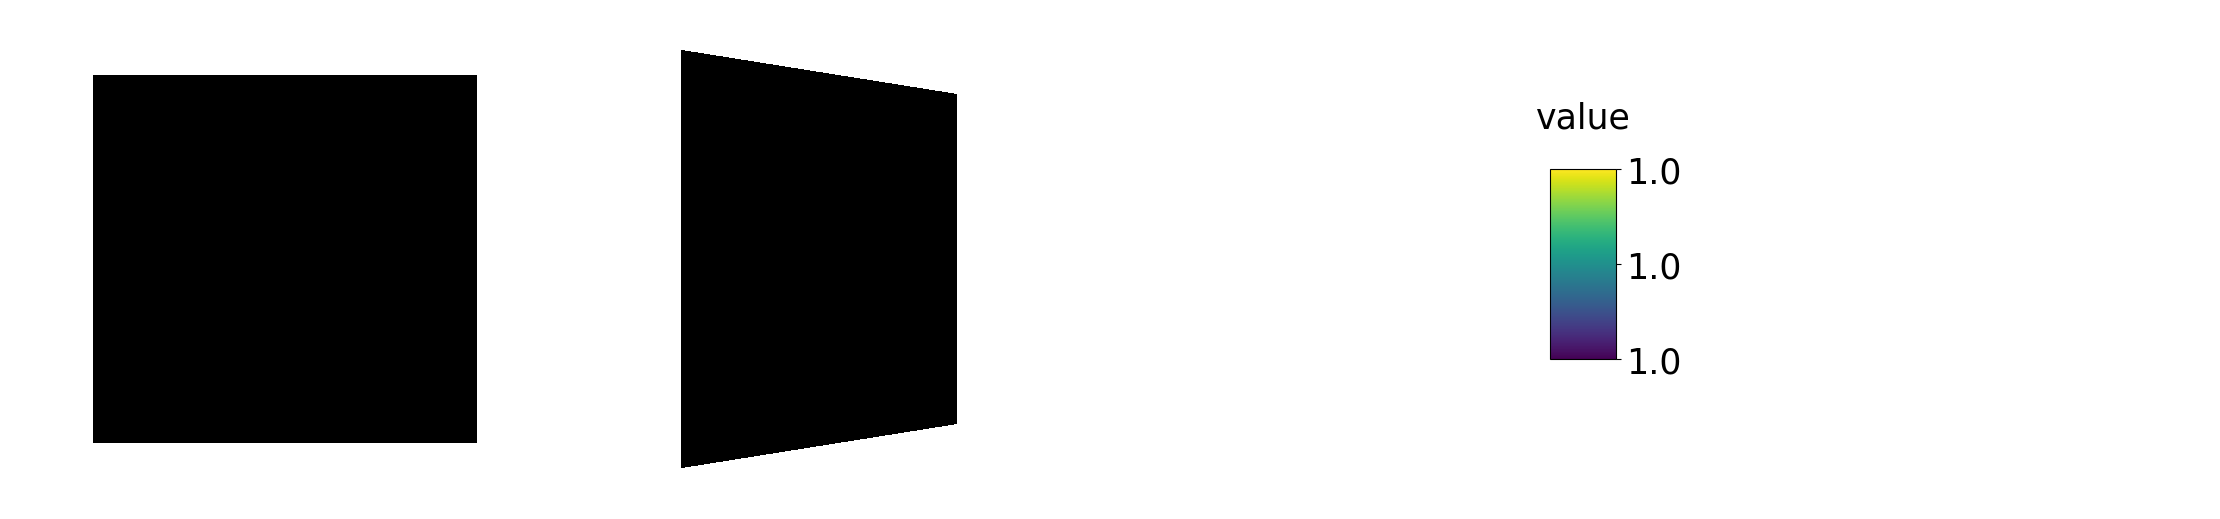

In [79]:
### Create and plot the plane alone

# create the vertices forming the plane
y = 150
yangle=0

# get the image shape
shape = brain_file.shape

# define coordonates of the 4 vertices of the square plane
v0 = f(0,y,0) # bottom left
v1 = f(shape[0],y+yangle,0) # bottom right
v2 = f(0,y,shape[2]) # top left
v3 = f(shape[0],y+yangle,shape[2]) # top right

vertices_plane = np.array([v0, v1, v2, v3])
print(vertices_plane)

# create the faces (triangles) forming the square plane
f1 = [0,1,2] 
f2 = [1,3,2] 
faces_plane = np.array([f1,f2])

# create the overlay for the square
overlay_plane = np.array([1,1,1,1])

# plot the plane
plot_surf(vertices_plane, faces_plane, overlay_plane, 
          rotate=[0, 45, 90]
         )

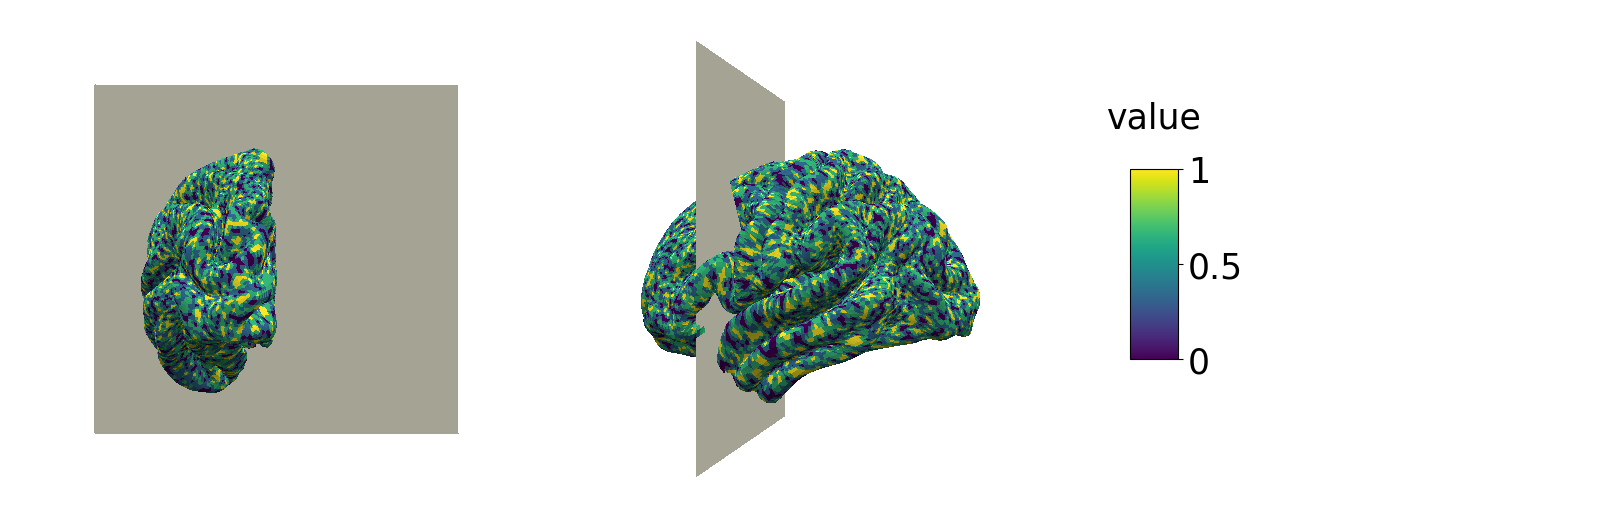

In [81]:
### Plot the plane on the surface

# update plane vertices and faces to match the brain scale
vertices = np.vstack([vertices_brain, vertices_plane])

faces = np.vstack([faces_brain, faces_plane+len(vertices_brain)])
overlay = np.hstack([overlay_brain, overlay_plane*2])

# create the transparency of the plane
alpha = np.ones(len(vertices))
alpha[-4::] = alpha[-4::]*0.1

# parcel = np.zeros(len(vertices))
# parcel[-4::] = 1

plot_surf(vertices, faces, overlay, 
          rotate=[0, 80], 
          alpha_colour=alpha,
          # parcel = parcel,
          # filled_parcels = False
            # show_back=True,
          vmin=0,vmax=1
         )